In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

For this experiment, i decided to work on the dataset from 2020, in order to investigate the impact of the COVID pandemic with regards to the value of the Bitcoin.

In [16]:
df = pd.read_csv('/content/BTC-2020min.csv')
print(df.columns)

Index(['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'Volume BTC',
       'Volume USD'],
      dtype='object')


Since the dataset contains an entry for every minute in the year, I decided to group the records by the day value withing the "date" field. Also, for the group method, I decided to compute the mean of the values for every minute in the respective day.

In [20]:
df['date'] = pd.to_datetime(df['date'])

df['date'] = df['date'].dt.date

grouped_data = df.groupby('date')

daily_avg_data = grouped_data.mean()

output_csv_path = '/content/bitcoin_2020_groupby_date.csv'
daily_avg_data.to_csv(output_csv_path)

print(daily_avg_data.head())

                    unix         open         high          low        close  \
date                                                                           
2020-01-01  1.577880e+09  7195.544406  7197.780417  7193.547547  7195.470598   
2020-01-02  1.577966e+09  7072.444243  7075.311576  7069.474139  7072.435688   
2020-01-03  1.578053e+09  7217.387965  7221.728931  7213.336312  7217.607403   
2020-01-04  1.578139e+09  7321.569264  7324.154479  7318.995472  7321.510688   
2020-01-05  1.578226e+09  7429.922042  7432.580778  7427.370174  7429.768535   

            Volume BTC    Volume USD  
date                                  
2020-01-01    0.773876   5568.056476  
2020-01-02    2.758825  19391.922773  
2020-01-03    5.606062  40536.645255  
2020-01-04    2.261623  16544.766784  
2020-01-05    1.880051  13962.848190  


<ipython-input-20-fdefdb872a17>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_avg_data = grouped_data.mean()


I decided to plot the evolution of the "open" value from the dataset. This number represents the value of the bitcoin from the respective day.

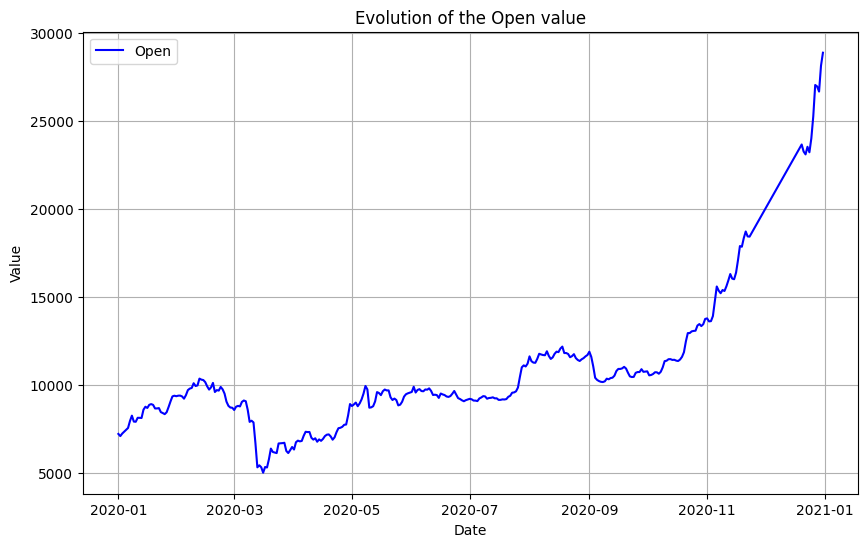

In [26]:
bitcoin_2020_groupby_date = '/content/bitcoin_2020_groupby_date.csv'
df = pd.read_csv(bitcoin_2020_groupby_date)

df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(10, 6))

# Plot 'open' field in blue
plt.plot(df['date'], df['open'], label='Open', color='blue')

# Customize the plot
plt.title('Evolution of the Open value')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

As previously displayed, we can observe a fall in the price of the bitcoin during March. This corresponds to the same period that the COVID pandmenic started, and it might have as explanation the uncertainty of the people with regards to how everything will evolve. We can see a rapid increase in the value soon after that.